In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.shape

(614, 13)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.shape

(614, 13)

### Loan_ID column is no use, so drop that

In [9]:
df.drop('Loan_ID', axis=1, inplace=True)
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
cols = ['LoanAmount','Loan_Amount_Term','Credit_History','Gender','Married','Self_Employed','Dependents']

for i in cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
326,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y
318,Female,No,1,Graduate,No,3541,0.0,112.0,360.0,1.0,Semiurban,Y
436,Male,No,0,Graduate,No,1926,1851.0,50.0,360.0,1.0,Semiurban,Y
449,Male,No,1,Not Graduate,Yes,2769,1542.0,190.0,360.0,1.0,Semiurban,N
459,Male,Yes,0,Graduate,No,8334,0.0,160.0,360.0,1.0,Semiurban,N
146,Female,Yes,2,Graduate,No,14866,0.0,70.0,360.0,1.0,Urban,Y
252,Male,No,0,Not Graduate,Yes,2583,2167.0,104.0,360.0,1.0,Rural,Y
188,Male,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
423,Male,Yes,1,Graduate,No,7250,1667.0,110.0,360.0,0.0,Urban,N
536,Male,Yes,0,Graduate,No,6133,3906.0,324.0,360.0,1.0,Urban,Y


In [13]:
print(df.Property_Area.unique())
print(df.Education.unique())
print(df.Self_Employed.unique())

['Urban' 'Rural' 'Semiurban']
['Graduate' 'Not Graduate']
['No' 'Yes']


df.Gender.replace({"Male":0, "Female":1}, inplace=True)
df.Married.replace({"No":0, "Yes":1}, inplace=True)
df.Education.replace({"Not Graduate":0, "Graduate":1}, inplace=True)
df.Self_Employed.replace({"No":0, "Yes":1}, inplace=True)
df.Property_Area.replace({"Rural":0, "Urban":1, "Semiurban":2}, inplace=True)
df.Loan_Status.replace({"N":0, "Y":1}, inplace=True)
df.sample(5)

In [14]:
df.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [15]:
df.shape

(614, 12)

In [16]:
# loan amount for months :
df.Loan_Amount_Term=df.Loan_Amount_Term / 12
df.Loan_Amount_Term = df.Loan_Amount_Term.astype('int')
df.sample(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
588,Male,No,0,Graduate,No,4750,0.0,94.0,30,1.0,Semiurban,Y
143,Male,Yes,0,Graduate,No,2698,2034.0,122.0,30,1.0,Semiurban,Y
370,Female,No,0,Graduate,Yes,15759,0.0,55.0,30,1.0,Semiurban,Y
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,30,1.0,Urban,Y
571,Male,Yes,0,Graduate,No,5116,1451.0,165.0,30,0.0,Urban,N
11,Male,Yes,2,Graduate,No,2500,1840.0,109.0,30,1.0,Urban,Y


In [17]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [18]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
558,Male,Yes,0,Graduate,No,3887,2669.0,162.0,30,1.0,Semiurban,Y
214,Male,Yes,0,Graduate,No,3173,3021.0,137.0,30,1.0,Urban,Y
96,Female,Yes,0,Graduate,No,2484,2302.0,137.0,30,1.0,Semiurban,Y
598,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,30,1.0,Rural,Y
123,Male,Yes,2,Graduate,No,2957,0.0,81.0,30,1.0,Semiurban,Y


In [19]:
df.Dependents = df.Dependents.str.split('+').str[0]
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
464,Male,No,0,Graduate,No,4166,0.0,98.0,30,0.0,Semiurban,N
133,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,10,1.0,Semiurban,Y
186,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,25,0.0,Rural,N
271,Male,Yes,0,Graduate,No,11146,0.0,136.0,30,1.0,Urban,Y
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,30,1.0,Semiurban,Y


In [20]:
# below 6 month, can't provide loan
#df.drop(df[df.Loan_Amount_Term <= 6].index, inplace=True)

In [21]:
df.ApplicantIncome = df.ApplicantIncome/100
#df.CoapplicantIncome = df.CoapplicantIncome/100
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
168,Male,No,0,Graduate,No,22.37,0.0,63.0,40,0.0,Semiurban,N
103,Male,Yes,0,Graduate,No,46.52,3583.0,120.0,30,1.0,Semiurban,Y
227,Male,Yes,2,Graduate,No,62.50,1695.0,210.0,30,1.0,Semiurban,Y
596,Male,Yes,2,Not Graduate,Yes,63.83,1000.0,187.0,30,1.0,Rural,N
17,Female,No,0,Graduate,No,35.10,0.0,76.0,30,0.0,Urban,N


In [22]:
df.duplicated().sum()

0

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

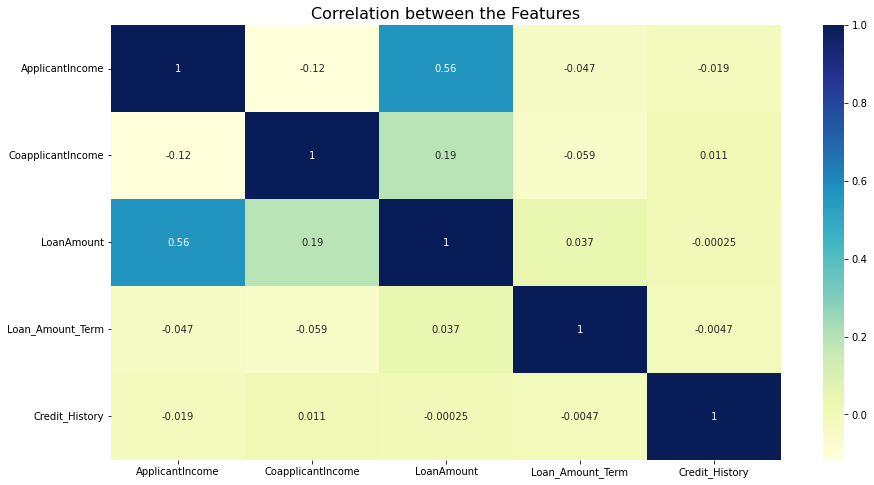

In [25]:

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

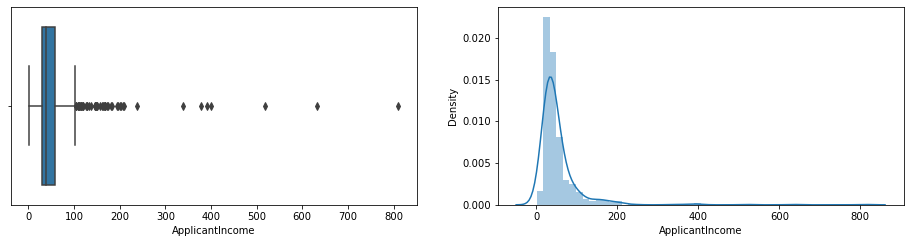

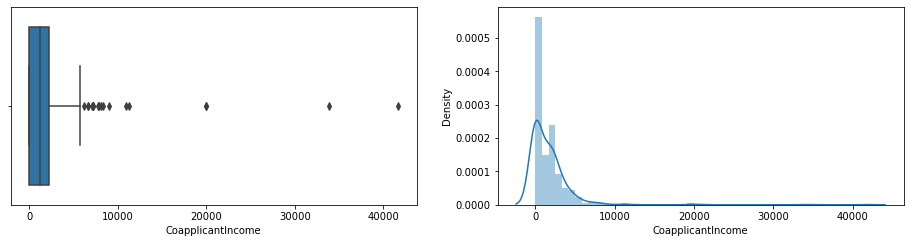

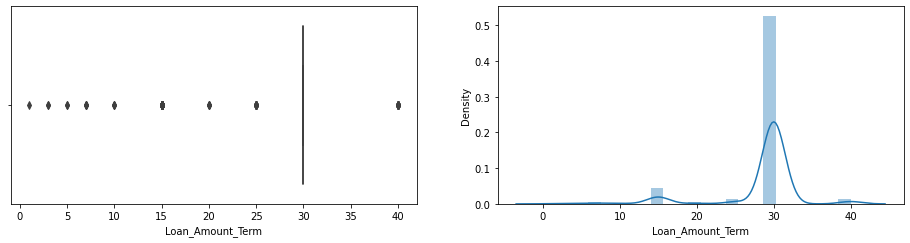

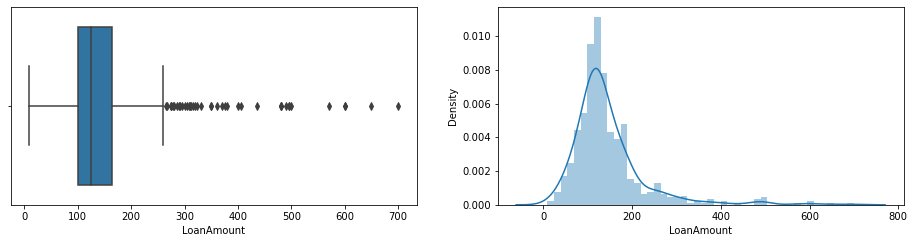

In [26]:
cols = ['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term', 'LoanAmount']

for i in cols:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    plt.subplot(2,2,d)
    sns.distplot(df[i])
    c=c+2
    d=d+1

### some outliers are there

In [27]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,58.49,0.0,120.0,30,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,45.83,1508.0,128.0,30,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,30.00,0.0,66.0,30,1.0,Urban,Y


### let's find outliers count

In [28]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,58.49,0.0,120.0,30,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,45.83,1508.0,128.0,30,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,30.00,0.0,66.0,30,1.0,Urban,Y


In [29]:
# df.drop(columns=['Dependents','Credit_History'], inplace=True)

In [30]:
def outliers_shape(col_name):
    try :
            # Finding the IQR
            percentile25 = df[col_name].quantile(0.25)
            percentile75 = df[col_name].quantile(0.75)
            iqr = percentile75 - percentile25
            
            upper_limit = percentile75 + 1.5 * iqr
            lower_limit = percentile25 - 1.5 * iqr
            
            
            # Finding Outliers
            size = df[df[col_name] > upper_limit]

            print(size.shape)
            
    except Exception as e :
        print('error is : ', e)

In [31]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(50, 12)
(18, 12)
(41, 12)


### Let's cap all

### There are 50 rows are outliers, so we cap them instead of removing

In [32]:
def cap_outliers (col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[col] = np.where(
        df[col] > upper_limit,
        upper_limit,
        np.where(
            df[col] < lower_limit,
            lower_limit,
            df[col]
        )
    )

In [33]:
colss = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in colss:
    cap_outliers(i)

In [34]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in cols:
    outliers_shape(i)

(0, 12)
(0, 12)
(0, 12)


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

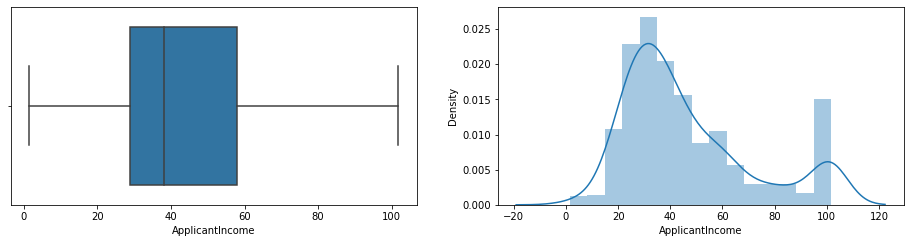

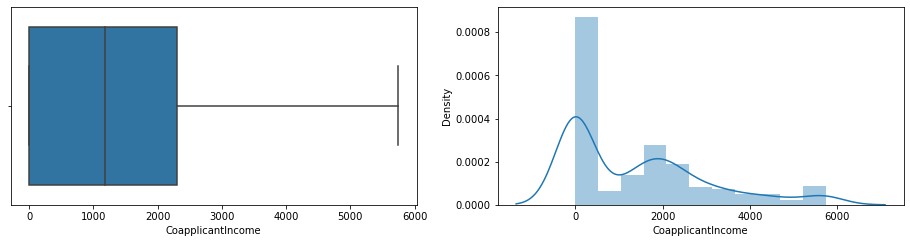

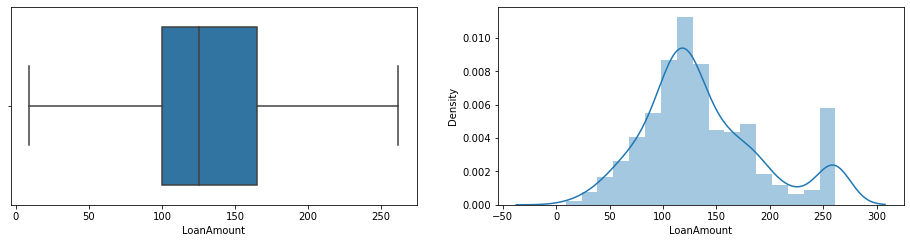

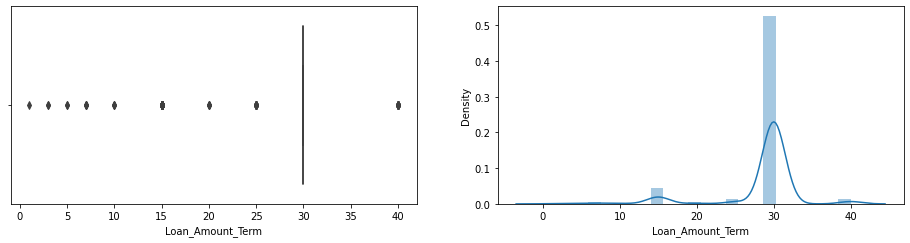

In [35]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in cols:
    plt.figure(figsize=(16,8))
    c=1
    d=2
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    plt.subplot(2,2,d)
    sns.distplot(df[i])
    c=c+2
    d=d+1

In [36]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
194,Male,No,0,Graduate,No,41.9100,0.000,120.0,30,1.0,Rural,Y
185,Male,Yes,0,Graduate,Yes,101.7125,4750.000,120.0,30,1.0,Semiurban,Y
124,Male,Yes,0,Not Graduate,No,43.0000,2014.000,194.0,30,1.0,Rural,Y
19,Male,Yes,0,Graduate,No,26.0000,3500.000,115.0,30,1.0,Urban,Y
177,Male,Yes,3,Graduate,No,55.1600,5743.125,261.5,30,0.0,Semiurban,N


In [37]:
cols = ['LoanAmount','Loan_Amount_Term','Dependents','Credit_History']
for i in cols:
    df[i] = df[i].astype('int')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    int32  
 8   Loan_Amount_Term   614 non-null    int32  
 9   Credit_History     614 non-null    int32  
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(2), int32(4), object(6)
memory usage: 52.8+ KB


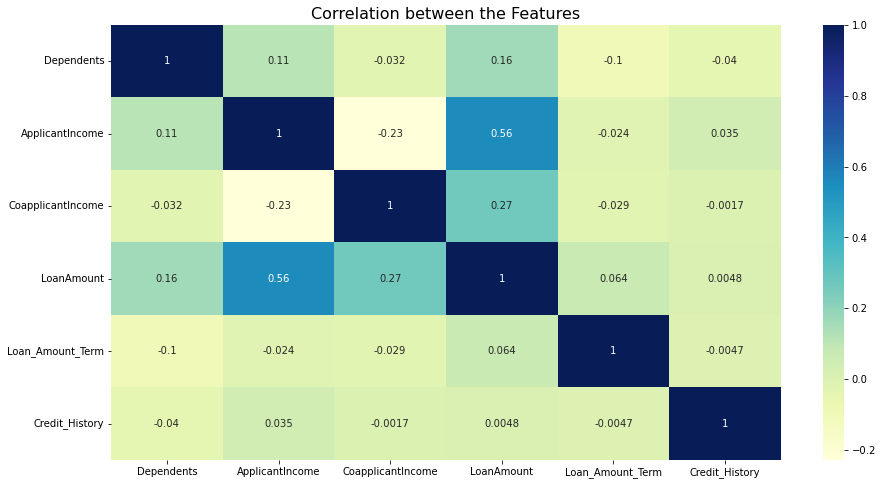

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [40]:
df.drop(columns=['Dependents'], inplace =True)
df.shape

(614, 11)

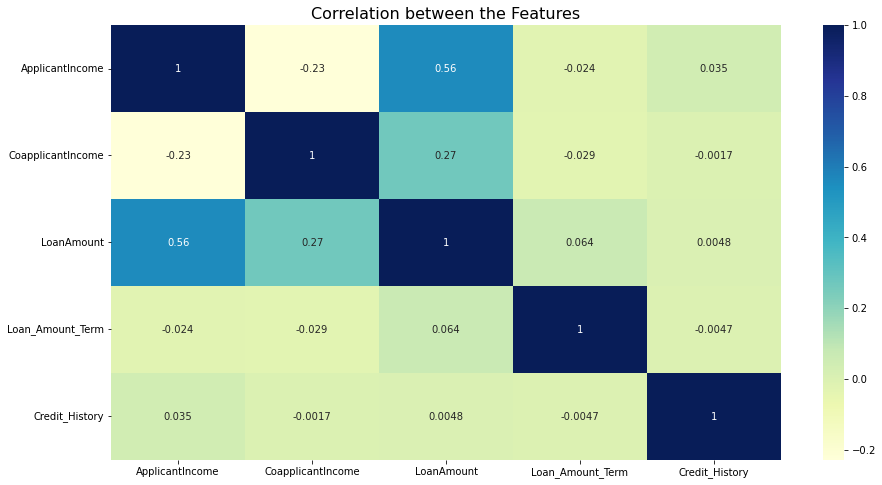

In [41]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [42]:
df1=df.copy()
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,58.49,0.0,120,30,1,Urban,Y
1,Male,Yes,Graduate,No,45.83,1508.0,128,30,1,Rural,N
2,Male,Yes,Graduate,Yes,30.00,0.0,66,30,1,Urban,Y
3,Male,Yes,Not Graduate,No,25.83,2358.0,120,30,1,Urban,Y
4,Male,No,Graduate,No,60.00,0.0,141,30,1,Urban,Y


In [49]:
from sklearn.Compose import ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,9])
],remainder='passthrough')

step1

ModuleNotFoundError: No module named 'sklearn.Compose'

In [44]:
# train_test_split
from sklearn.model_selection import train_test_split

X=df1.drop(columns=('Loan_Status'))
y=df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.07)
X_train.shape, X_test.shape

((571, 10), (43, 10))

In [45]:
X_train.head(3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
496,Male,Yes,Not Graduate,No,26.00,1700.0,107,30,1,Rural
81,Male,Yes,Graduate,Yes,23.95,0.0,120,30,1,Semiurban
141,Male,No,Graduate,No,54.17,0.0,168,30,1,Urban


In [46]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# fit and transform the data
#X_train = scaler.fit_transform(X_train)

# check the mean and standard deviation of the transformed data
#print(np.mean(X_train, axis=0)) # should be approximately [0, 0, 0]
#print(np.std(X_train, axis=0))

#sns.distplot(np.mean(X_train, axis=0))

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVR
from sklearn.ensemble import VotingClassifier,StackingClassifier
from xgboost import XGBClassifier

In [48]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train, y_train)
y_pred = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

ValueError: could not convert string to float: 'Male'

In [ ]:
# grid search - decison tree
param_grid = {'max_depth': [50,80,120,140,160,180,200],'min_samples_split': [4,5,6,7,8,9,10]}

# Initialize the model
model = DecisionTreeClassifier()

# Initialize GridSearchCV
mod = GridSearchCV(model, param_grid, cv=6)

# Fit the GridSearchCV to the data
mod.fit(X_train, y_train)
y_predict = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

# Print the best parameters
print(mod.best_params_)

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

mod = DecisionTreeClassifier(max_depth=80,
                               min_samples_split=10,
                               random_state=64)
mod.fit(X_train, y_train)
y_predict = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

In [ ]:
#  grid search - adaboost
param_grid = {'n_estimators': [10, 30,50,80], 'learning_rate': [0.01,0.1,0.2,0.3],}

# Initialize the model
model = AdaBoostClassifier()

# Initialize GridSearchCV
mod = GridSearchCV(model, param_grid, cv=6)

# Fit the GridSearchCV to the data
mod.fit(X_train, y_train)
y_predict = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

# Print the best parameters
print(mod.best_params_)

In [ ]:
# adaboost
mod = AdaBoostClassifier(n_estimators=15,learning_rate=0.01)

mod.fit(X_train,y_train)

y_pred = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

In [ ]:
# grid search - random forest

param_grid = {'n_estimators': [50, 150,250,300], 'max_depth': [6,7,8,9,10],}

# Initialize the model
model = RandomForestClassifier()

# Initialize GridSearchCV
mod = GridSearchCV(model, param_grid, cv=6)

# Fit the GridSearchCV to the data
mod.fit(X_train, y_train)
y_predict = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

# Print the best parameters
print(mod.best_params_)

In [ ]:
# gradient boosting 
mod = GradientBoostingClassifier(n_estimators=500)

mod.fit(X_train,y_train)

y_pred = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

In [ ]:
# voting

rf = RandomForestClassifier(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
dtc = DecisionTreeClassifier(random_state=3,max_features=0.75,max_depth=50,min_samples_split=9)
xgb = XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5)
ada = AdaBoostClassifier(n_estimators=10,learning_rate=0.01)
et = ExtraTreesClassifier(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

mod = VotingClassifier([('rf', rf), ('dtc', dtc), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])


mod.fit(X_train,y_train)

y_pred = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

In [ ]:
ada = AdaBoostClassifier(n_estimators=10,learning_rate=0.01)
dt = DecisionTreeClassifier(max_depth=80,
                               min_samples_split=9,
                               random_state=64)
gb = GradientBoostingClassifier(n_estimators=500)
lr = LogisticRegression()

mod = VotingClassifier([('ada1', ada), ('dt', dt), ('gb',gb), ('lr',lr)],weights=[5,1,1,1])


mod.fit(X_train,y_train)

y_pred = mod.predict(X_test)

print("Accuracy : ", accuracy_score(y_test,y_pred))

In [ ]:
import pickle

#pickle.dump(df1,open('df1.pkl','wb'))
#pickle.dump(mod,open('mod.pkl','wb'))

In [ ]:
mod